
# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

    Dans ce projet nous nous donnons pour objectif d'étudier un ensemble de données de rendez-vous médicaux au Brésil, qui se concentre sur la question de savoir quels sont les parametres qui justifient le respect au rendez-vous des differents patients.
    
        
### Dataset Description 

> Cet ensemble de données recueille des informations sur 100 000 rendez-vous médicaux au Brésil et se concentre sur la question de savoir si les patients se présentent ou non à leur rendez-vous. Un certain nombre de caractéristiques concernant le patient sont incluses dans chaque ligne.

* **ScheduledDay** nous indique le jour où le patient a fixé son rendez-vous.
* **Neighborhood** indique la localisation de l'hôpital.
* **Scholarship** indique si le patient est inscrit ou non au programme d'aide sociale brésilien Bolsa Família.
* **No_show** indique 'Non' si le patient s'est présenté à son rendez-vous, et 'Oui' s'il ne s'est pas présenté.

### Question(s) for Analysis

> À partir de ces données nous allons pour notre part répondre aux questions suivantes:
* **1. L'envoi du SMS favorise le respect des rendez-vous ?**
* **2. Dans quels hôpitaux les patients les patients respectent le plus leur rendez-vous ?**
* **3. Les sujets de quelle maladie respectent leur rendez-vous?**
* **4. Quelles relations il y'a entre chaque maladie et le fait que le patient soit inscrit au programme d'aide sociale ?**

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==1.1.5

Requirement already up-to-date: pandas==1.1.5 in /opt/conda/lib/python3.6/site-packages (1.1.5)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning 

- La tailles des données

In [7]:
df.shape

(110527, 14)

L'ensemble des données comporte **110527** lignes et **14** colonnes.

- Les types des cellules

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#afficher les colonnes numériques
df.select_dtypes(include='number').columns

Index(['PatientId', 'AppointmentID', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'],
      dtype='object')

In [10]:
#afficher les colonnes object (cha6ine de caractère)
df.select_dtypes(include='object').columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show'], dtype='object')

- Verifions l'exitance des valeurs manquantes

In [11]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Notre ensemble ne contient pas de valeurs nulles

- Vérifions l'existance des valeurs abérantes
>Nous allons effectuer cette vérification sur la colonne âge. Les autres colonnes entières sont plutôt des variables catégorielles.

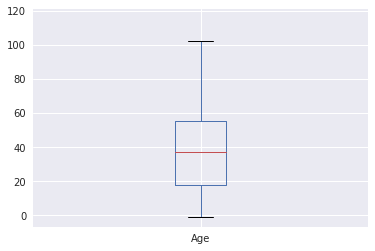

In [12]:

df.Age.plot(kind='box');

In [13]:
df[df['Age'] < 0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


La colonne `Age` presente des valeurs abérantes.

In [14]:
# Les valeurs uniques de la colonnes age
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

>Dans le cas où un patient peut-être un BB, la valeur aberrante ici va être `-1`.

* Vérifions les doublons

In [15]:
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> L'ensemble de données ne contient pas de doublons

### Nettoyage des données
* Suppression de valeurs abérantes

In [16]:
# Selection des lignes qui contient la valeur abérantes
outlers = df[df.Age < 0]
outlers

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [19]:
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [20]:
#Suppression des lignes concernées
df.drop(outlers.index, inplace=True)

In [21]:
df.shape

(110526, 14)

>Nous avons maintenant 110526 lignes

- Suppression de colonnes

> Les colonnes `PatientId` et `AppointmentID` ne nous apprennent rien sur les questions auxquelles nous voulons repondre.

In [22]:
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [23]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- Nous allons renommer les colonnes pour une mieux travailler avec notre ensemble de données.

In [24]:
# Changer la case des noms de colonnes
df.rename(columns= lambda x: x.lower(), inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
# Transformer 'no-show' en 'no_show'
df.rename(columns= {'no-show':'no_show'},inplace=True )
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

- Visulation des données
>Histograme pour chaque caractéristique

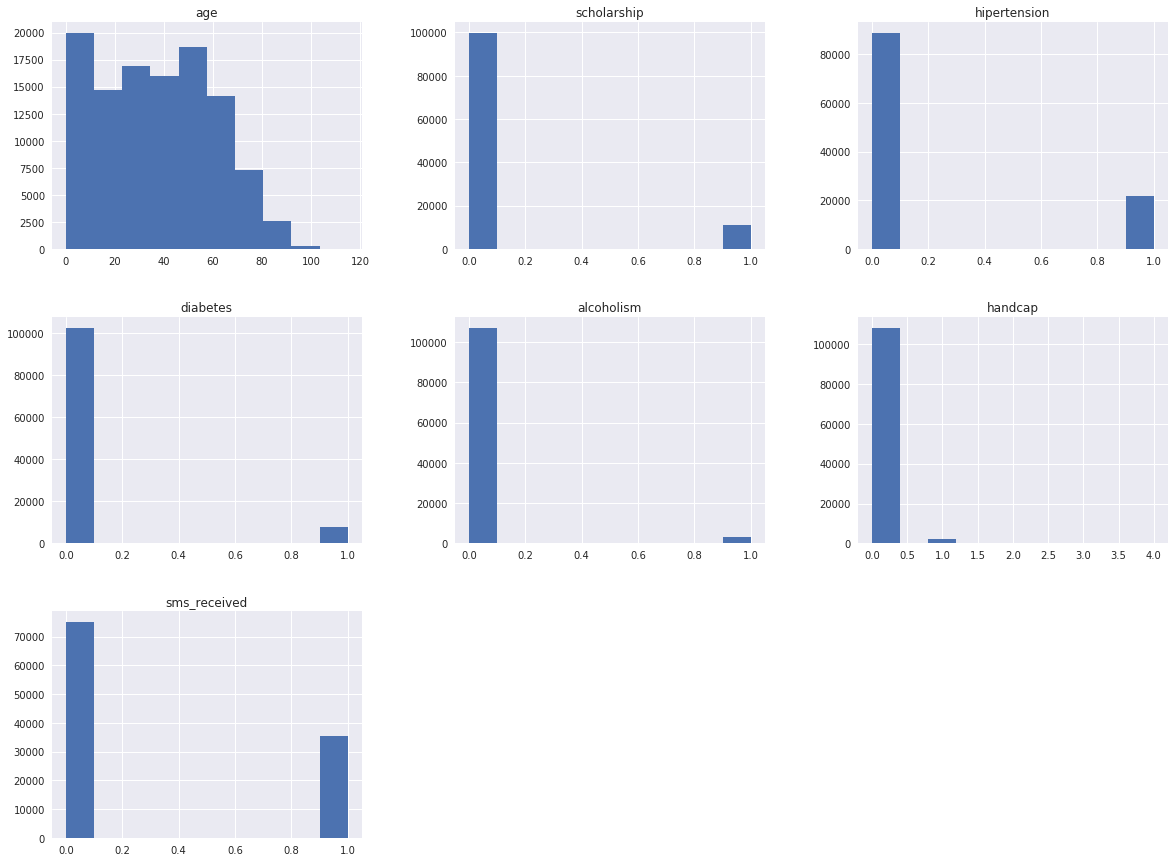

In [26]:
df.hist(figsize = (20,15));

In [27]:
#L'age moyenne
df.age.mean()

37.089218826339504

In [28]:
df_describe = df.describe(include='all')
df_describe

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,110526,110526,110526,110526.000000,110526,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526
unique,2,103548,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,71839,24,4691,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88207
mean,NaN,NaN,NaN,37.089219,NaN,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,NaN
std,NaN,NaN,NaN,23.110026,NaN,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,NaN
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [29]:
df_describe.iloc[2:4]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,71839,24,4691,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88207


>La majorité des patients ont respecté leurs rendez-vous, L'hôpital situé dans le quartier JARDIM CAMBURI a enregistré le plus de prise de rendez-vous et l'ensemble de données contient plus de femmes.

### Question 1 :  L'envoi du SMS favorise le respect des rendez-vous ?

* Calcule des proportions

In [30]:
# nombre de personnes qui ne se présentent pas à leurs rendez-vous.
df_no_show = df.groupby('no_show').count()
df_no_show.gender

no_show
No     88207
Yes    22319
Name: gender, dtype: int64

In [32]:
# nombre de personnes qui ne se présentent pas à leurs rendez-vous.
nb_no_show = df_no_show.gender[1]
nb_no_show

22319

In [33]:
# nombre de personnes qui se présentent à leurs rendez-vous.
nb_show = df_no_show.gender[0]
nb_show

88207

In [34]:
# nombre de personnes qui ne reçoivent pas de SMS
df_sms = df.groupby('sms_received').count()
df_sms.gender

sms_received
0    75044
1    35482
Name: gender, dtype: int64

In [35]:
# nombre de personnes qui ne reçoivent pas de SMS
nb_sms = df_sms.gender[1]
nb_sms

35482

In [36]:
# nombre de personnes qui ne recoivent pas de sms
nb_no_sms = df_sms.gender[0]
nb_no_sms

75044

In [37]:
df.sms_received.unique()

array([0, 1])

In [38]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [39]:
# Nombre de personnes qui qui ont reçu un SMS et ont respecté leurs rendez-vous.
nb_show_sms = df.loc[(df.no_show== 'No') & (df.sms_received == 1)].count().sms_received
nb_show_sms

25698

In [40]:
# Nombre de personnes qui n'ont pas reçu un SMS et qui ont respecté leurs rendez-vous.
nb_show_no_sms = df.loc[(df.no_show== 'No') & (df.sms_received == 0)].count().sms_received
nb_show_no_sms

62509

In [41]:
# Nombre de personnes qui qui n'ont pas reçu un SMS et n'ont pas respecté leurs rendez-vous.
nb_no_show_no_sms = df.loc[(df.no_show== 'Yes') & (df.sms_received == 0)].count().sms_received
nb_no_show_no_sms

12535

In [42]:
# Nombre de personnes qui ont reçu un SMS et ont respecté leurs rendez-vous.
nb_no_show_sms = df.loc[(df.no_show== 'Yes') & (df.sms_received == 1)].count().sms_received
nb_no_show_sms

9784

In [43]:
# Proportion de ceux qui ont reçu un sms et ont respecté leur rendez vous.
prop_show_sms = nb_show_sms/nb_sms
# Proportion de ceux qui ont reçu un SMS et n'ont pas respecté leur rendez vous
prop_no_show_sms = nb_no_show_sms/nb_sms

prop_show_sms,prop_no_show_sms

(0.7242545516036301, 0.27574544839637)

In [44]:
# fonction pour visualiser les proportion
def graphique_proportion(list_labels,list_valeurs,title):
    plt.bar(list_labels,list_valeurs)
    plt.title(title);

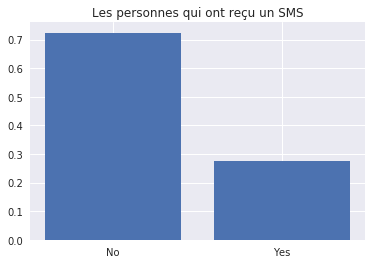

In [45]:
graphique_proportion(['No','Yes'],[prop_show_sms,prop_no_show_sms],'Les personnes qui ont reçu un SMS')

In [46]:
# Proportion de ceux qui n'ont pas reçu un SMS et ont respectés leur rendez vous.
prop_show_no_sms = nb_show_no_sms/nb_no_sms
# Proportion de ceux qui n'ont pas reçu un SMS et n'ont pas respectés leur rendez-vous.
prop_no_show_no_sms = nb_no_show_no_sms/nb_no_sms
prop_show_no_sms,prop_no_show_no_sms

(0.8329646607323703, 0.16703533926762965)

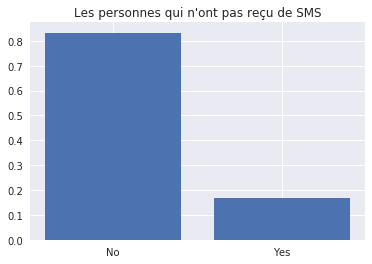

In [47]:
# Visualisation des proportions
graphique_proportion(['No','Yes'],[prop_show_no_sms,prop_no_show_no_sms],"Les personnes qui n'ont pas reçu de SMS")

>Nous avons environ **28%** de ceux ayant reçu un SMS n'ont pas respecté leurs rendez-vous et plus de **83%** ce ceux qui n'ont pas reçu des SMS ont respecté leurs rendez-vous. Il apparaît que le respect des rendez-vous n'est pas forcément lié au fait que les patients reçoivent ou non un SMS.

### Research Question 2  : Dans quelles hopitals les patients patients respectent le plus leur rendez-vous ?

In [48]:
#Les noms des qurtiers des hôpitaux
h = df.neighbourhood.unique()
h

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [49]:
# Le nombre d'hôpitaux
len(h)

81

In [50]:
# Le nombre de rendez-vous par hopial
hop = df.groupby('neighbourhood').no_show.count()
hop

neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1977
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: no_show, Length: 81, dtype: int64

- Visualisation du nombre de rendez-vous par Hôpital

In [51]:
# Visualisation des diagramme en bar
def graphique_bar(valeurs,x_labels,y_label, title,xticklabels,f_size =(15,15)):
    plt.figure(figsize=f_size)
    fig = valeurs.plot(kind='bar')
    fig.set_title(title)
    fig.set_xlabel(x_labels)
    fig.set_ylabel(y_label)
    fig.set_xticklabels(xticklabels);

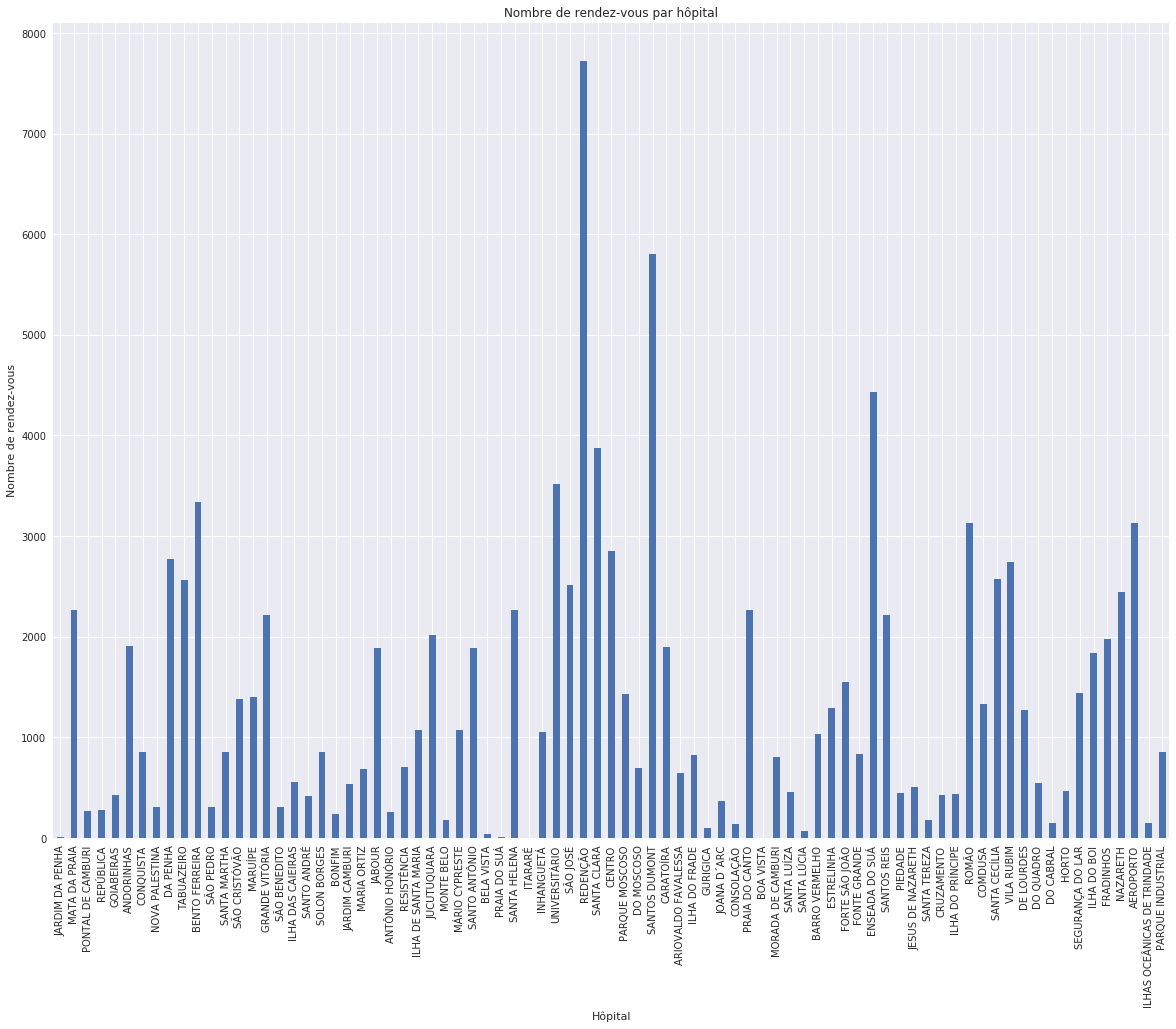

In [52]:
graphique_bar(hop,'Hôpital','Nombre de rendez-vous','Nombre de rendez-vous par hôpital',h, (20,15))

> L'hôpital  qui a eu le plus de prise de rendez-vous est celui de **REDENÇÃO** suivi par celui de **SANTOS DUMONT**.

In [58]:
# Le nombre de rendez-vous respecté par hopial
df_no = df[df.no_show == 'No']
hop_show = df_no.groupby('neighbourhood').gender.count()
hop_show

neighbourhood
AEROPORTO                 7
ANDORINHAS             1741
ANTÔNIO HONÓRIO         221
ARIOVALDO FAVALESSA     220
BARRO VERMELHO          332
                       ... 
SÃO JOSÉ               1549
SÃO PEDRO              1933
TABUAZEIRO             2559
UNIVERSITÁRIO           120
VILA RUBIM              710
Name: gender, Length: 80, dtype: int64

In [57]:
# La proportion de rendez-vous respecté par hôpital
prop = np.divide(hop_show,hop)
prop

neighbourhood
AEROPORTO              0.875000
ANDORINHAS             0.769673
ANTÔNIO HONÓRIO        0.815498
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
                         ...   
SÃO JOSÉ               0.783510
SÃO PEDRO              0.789624
TABUAZEIRO             0.817050
UNIVERSITÁRIO          0.789474
VILA RUBIM             0.834313
Length: 81, dtype: float64

- Visualisation des propotions des rendez-vous respectés par hôpital

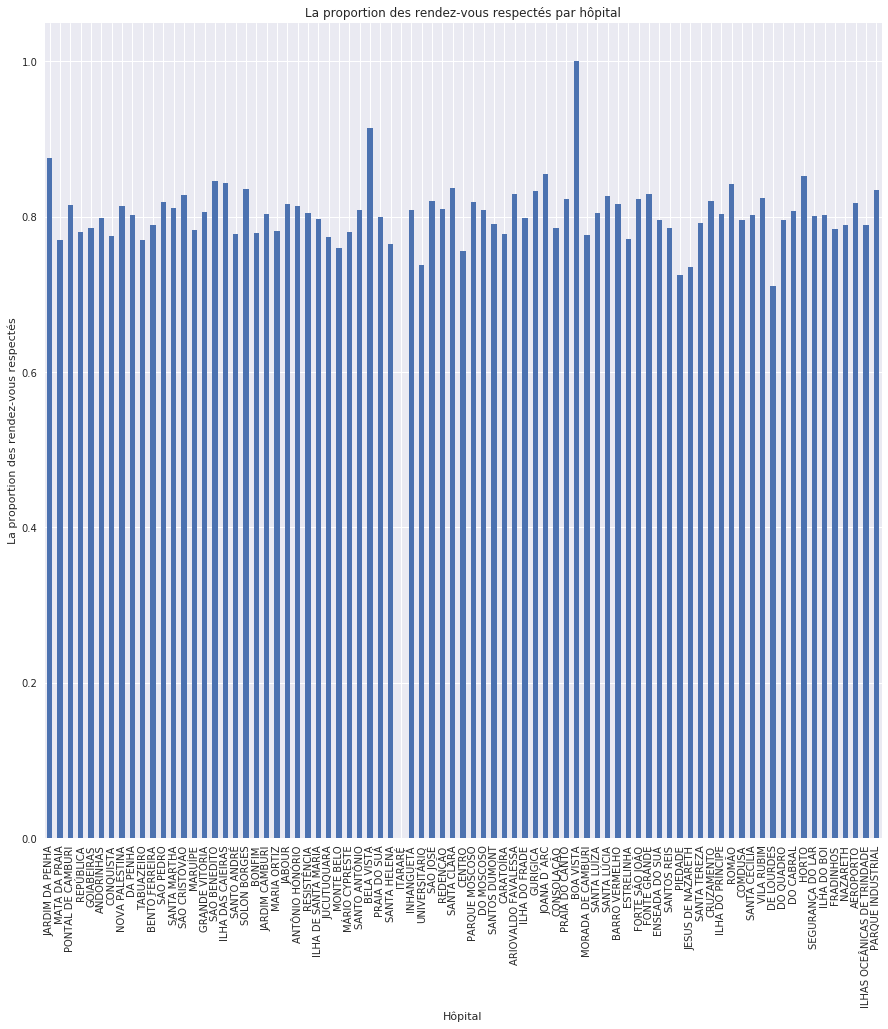

In [61]:
graphique_bar(valeurs=prop,title='La proportion des rendez-vous respectés par hôpital',x_labels='Hôpital',\
              y_label='La proportion des rendez-vous respectés',xticklabels=h)

>**JARDIM DA PENHA**, **BELA VISTA** et **BOA VISTA** sont les hôpitaux qui enregistrent le plus rendez-vous respectés, malgré le faible nombre de rendez-vous dans ces hôpitaux.

### Research Question 3  : Les sujets de quelle maladie respectent leur rendez-vous?

In [ ]:
df.head()

In [ ]:
# Groupe de maladies

maladies = df.groupby('no_show').sum()
maladies

In [ ]:
# Visualiation de la repartions des données
df_mal = maladies.loc[:,'hipertension':'handcap']
df_mal.plot.bar(rot=0);
plt.title('Repartition des maladies');

>Visiblement les sujets souffrant d'hypertension respectent leur rendez-vous.

### Research Question 4  : Quelles relations il y'a entre chaque maladie et le fait que le patient soit inscrit au programme d'aide sociale

In [ ]:
# grouper les données en fonction de la caratéristique scholarship
scholarship_group = df.groupby('scholarship').sum()
scholarship_group

In [ ]:
# Sélection des données concernant uniquement les aides sociales
scholarship = scholarship_group.loc[:,'hipertension':'handcap']
scholarship

- Visualisation

In [ ]:
scholarship.plot.bar();

> Les personnes qui sont inscrites pour l'aide sociale sont en majorité les personnes souffrantes d'hypertension.

<a id='conclusions'></a>
## Conclusions

>Notre investigation sur l'ensemble de données des rendez-vous médicaux au Brésil, nous permet de répondre avec réserve aux questions que nous nous sommes posé plus haut. L'analyse des données nous laisse voir que les SMS ne favorisent pas le respect des rendez-vous par les patients, ensuite que les hypertendus sont de ceux qui respectent les plus leurs rendez-vous et sont en très grande majorité inscrits à l'aide sociale.

>Enfin des hôpitaux des quartiers tels que JARDIM DA PENHA, BELA VISTA et BOA VISTA ont un plus grand taux de rendez-vous respecté, même s'ils n'enregistrent pas le grand nombre de rendez-vous (peut-être dû au service).

>Toutefois, il nous faut éprouver ces conclusions avec des résultats de méthodes statiques.

>Nous pouvons aussi relever quelques limitations de notre ensemble de données, il serai très interessant d'avoir une colonne `note` qui indique le niveau de satisfaction des patients ayant respecté leur rendez-vous, ce qui pourrait nous aider à mieux comprendre les proportions de rendez-vous respecté par hôpitaux. Une autre colonne `distance` qui indiquerait la distance entre le quartier du patient et celui de l'hôpital où il a rendez-vous, ce qui nous permettrait de savoir si c'est un facteur determinant dans le respect des rendez-vous.

References:
* https://pandas.pydata.org/docs/user_guide/index.html
* http://www.python-simple.com/python-numpy/fonctions-numpy.php#:~:text=C%27est%20la%20multiplication%20terme,a%20%3D%20numpy.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0